# Forex candle vs. open value

A chain of LSTM modules is fed with forex open, high, low, close and volume data.

In [1]:
import sys
import os
from os import path
import importlib

import numpy as np
np.set_printoptions(formatter={'float_kind':"{:-.3e}".format})
np.random.seed(0)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 4)

import torch
torch.manual_seed(0)

import torch.nn as nn
from torch.autograd import Variable

SRC_DIR = path.join(os.path.abspath(""), '../')
sys.path.append(SRC_DIR)

from core import _
import hist_data as hd

In [2]:
hd.set_hist_data(data_count=None)

In [3]:
import math
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:-.3e}".format})
np.random.seed(0)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 4)

import torch
torch.manual_seed(0)

import torch.nn as nn
from torch.autograd import Variable

import hist_data as hd
from nn_tools.data_sources import CandleVsOpenDs

from core import _

In [4]:
import nn_tools.data_sources as ds
_ = importlib.reload(ds)
import nn_tools.data_sequencer as cs

from models.lstm_model import Model, NnDriver

In [5]:
data = list(hd.DICT_DATA.values())
DataSource = CandleVsOpenDs

In [6]:
verbose = 1

ds = DataSource(
        (MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()),
        step=3,
        verbose=verbose
        )

dr = NnDriver(
    data_source=ds,
    model_object=Model(
        hidden_size=100, 
        num_layers=3,
        ),
    future_count=50,
    seq_len=5,
    num_epochs=1000,
    accuracy=1e-5,
    learning_rate=0.001,
    verbose=verbose
    )

if verbose > 0:
    print(dr)


input size: 20
output size: 1
LSTM:  Model(
  (model): LSTM(20, 100, num_layers=3, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)



In [7]:
ds.fit_data(data[:20000])

DEBUG:fit_data: 
self.opens(min. max): (0.00, 1.000)
self.volumes(min. max): (0.00, 1.000)



In [12]:
training_end_index = 10000
training_data = data[:training_end_index]

dr.train(
    data_count=2000, 
    end_index=len(training_data) - dr.future_count,
    verbose=1 # verbose
    )


Loss decreased from 9.4e-05 till 1.5e-05


In [9]:
shift = 50

In [10]:
verbose = 0

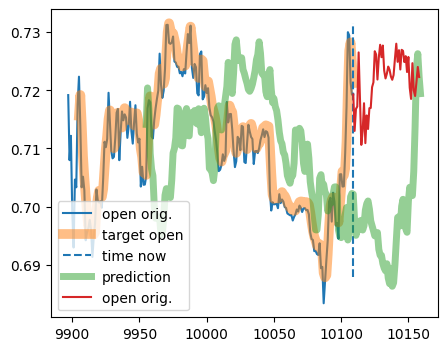

In [24]:
testing_end_index = training_end_index + shift
shift += 5
testing_data = data[:testing_end_index] 

dr.context_seq.data_source.data = testing_data 
dr.show_action(
end_index=testing_end_index,
data_count=150,
future_data=dr.context_seq.data_source.future_data(
                        data, 
                        testing_end_index-1, 
                        length=50),
show_features=False,
verbose=verbose)